In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from graspologic.inference import ldt_function, LatentDistributionTest
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot

In [52]:
n_components = 4 # the number of embedding dimensions for ASE
P = np.array([[0.9, 0.11, 0.13, 0.2],
              [0, 0.7, 0.1, 0.1],
              [0, 0, 0.8, 0.1],
              [0, 0, 0, 0.85]])

P = symmetrize(P)
n_verts_diff = []
p_vals_function = []
p_vals_class = []
p_vals_diff = []
A1 = sbm([50]*4, P)

In [54]:
for n in range(50, 201, 10):
    for _ in range(100):
        A2 = sbm([n]*4, P)
        
        np.random.seed(888)
        ldt_class = LatentDistributionTest(n_bootstraps=50, n_components=n_components)
        ldt_class.fit(A1, A2)
        p_val_class = ldt_class.p_value_
        
        np.random.seed(888)
        p_val_func, _, _ = ldt_function(A1, A2, n_bootstraps=50, n_components=n_components)

        p_vals_function.append(p_val_func)
        p_vals_class.append(p_val_class)
        p_vals_diff.append(p_val_func - p_val_class)
        n_verts_diff.append(n-50)
        
        print(ldt_class.p_value_)
        
    
p_vals_dict = {"p-values class": p_vals_class, "p-values function": p_vals_function}
df = pd.DataFrame(data = p_vals_dict, index = n_verts_diff)
df.to_csv('p_values_ldt.csv')

p_vals_diff_dict = {"p_value diff": p_vals_diff, "n_verts diff": n_verts_diff}
df_diff = pd.DataFrame(data=p_vals_diff_dict)

0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02
0.02


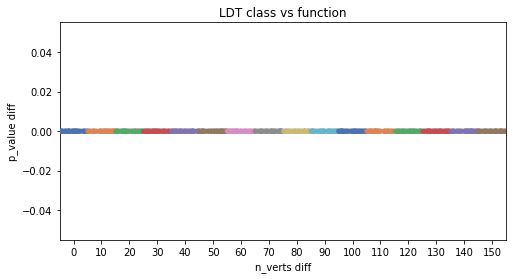

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.stripplot(data=df_diff,
    x="n_verts diff",
    y="p_value diff",
    jitter = 0.5,
    alpha = 0.5,
    size=5,
    palette="deep",
)
plt.title("LDT class vs function")
ax.axhline(0, color="black", linestyle="--", alpha=0.5)